In [3]:
from IPython.display import Image     # Import the Image function from IPython.display to display images in Jupyter environments.
from os import chdir                  # Import chdir from os module to change the current working directory.
from scipy.spatial import Delaunay  # Importar Delaunay
import numpy as np                    # Import numpy library for working with n-dimensional arrays and mathematical operations.
import gudhi as gd                    # Import gudhi library for computational topology and computational geometry.
import matplotlib.pyplot as plt       # Import pyplot from matplotlib for creating visualizations and graphs.
import argparse                       # Import argparse, a standard library for writing user-friendly command-line interfaces.
import seaborn as sns                 # Import seaborn for data visualization; it's based on matplotlib and provides a high-level interface for drawing statistical graphs.
import requests # Import requests library to make HTTP requests in Python easily.
import pandas as pd
from scipy.spatial.distance import pdist, squareform 
from sklearn.decomposition import PCA

In [4]:
import os
import requests
import csv
#Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-alumno15/Celulas_cancer/carpeta_csv"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa, header=None)
    nombres_columnas = ['id', 'X', 'Y',  'Tipo']  # Reemplazar con los nombres de columnas apropiados
    df.columns = nombres_columnas
    
    # Mostrar las primeras filas del DataFrame
    print("Contenido de", archivo_csv)
    print(df.head(5))
    
    # Contar el número de IDs distintos
    num_ids_distintos = df['id'].nunique()
    print("Número de IDs distintos:", num_ids_distintos)

Contenido de low_grade_dysplasia.csv
       id            X            Y              Tipo
0  CellID   X_centroid   Y_centroid         phenotype
1      87  14793.98923  8843.229803       CD8 T cells
2     186  15204.70638  8889.964765  non-immune cells
3     208  14862.13941  9015.434316       CD4 T cells
4     274   15083.8345  8601.980365       CD8 T cells
Número de IDs distintos: 1265
Contenido de invasive_carcinoma.csv
       id            X            Y                Tipo
0  CellID   X_centroid   Y_centroid           phenotype
1       3  6581.417391  5280.356522  M1 type macrophage
2       4  11350.68852  10398.80679         tumor cells
3       6  5095.565574  12148.07705         tumor cells
4       8  6702.515974  10651.21885         CD8 T cells
Número de IDs distintos: 46018
Contenido de high_grade_dysplasia.csv
       id            X            Y              Tipo
0  CellID   X_centroid   Y_centroid         phenotype
1      28  15954.03297  10809.96703  non-immune cells
2     

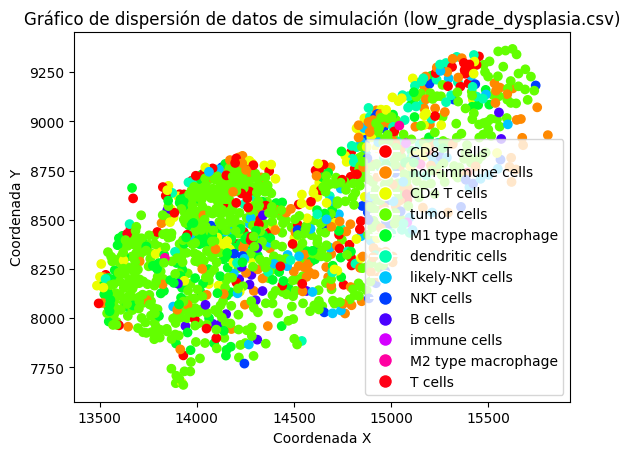

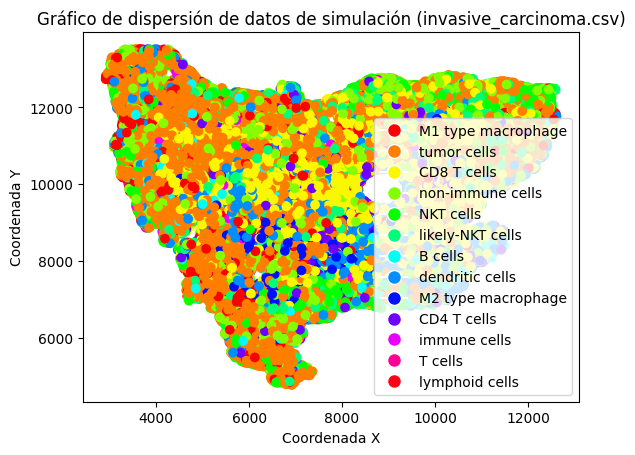

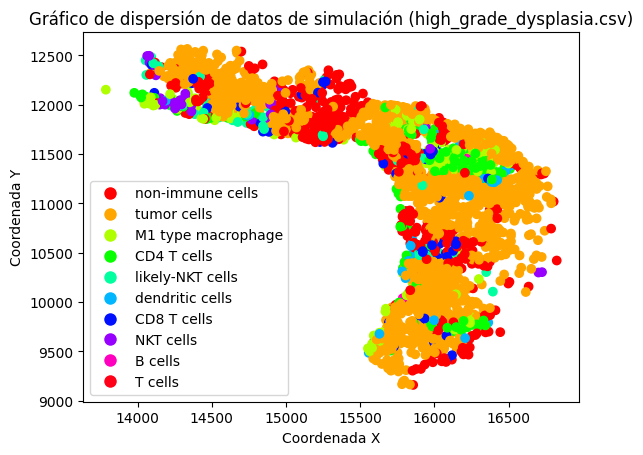

DataFrame 1:
      CellID   X_centroid   Y_centroid         phenotype
0         87  14793.98923  8843.229803       CD8 T cells
1        186  15204.70638  8889.964765  non-immune cells
2        208  14862.13941  9015.434316       CD4 T cells
3        274  15083.83450  8601.980365       CD8 T cells
4        387  15560.44458  9170.899244  non-immune cells
...      ...          ...          ...               ...
1259   96234  14937.39352  8965.027778       tumor cells
1260   96574  14434.18121  8548.563758       tumor cells
1261   96901  13640.95402  8072.425287       tumor cells
1262   97160  14186.50746  8641.850746  non-immune cells
1263   97442  14077.78571  8389.897959       tumor cells

[1264 rows x 4 columns]

DataFrame 2:
       CellID    X_centroid    Y_centroid           phenotype
0           3   6581.417391   5280.356522  M1 type macrophage
1           4  11350.688520  10398.806790         tumor cells
2           6   5095.565574  12148.077050         tumor cells
3           8   

In [6]:
# Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-alumno15/Celulas_cancer/carpeta_csv"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Inicializar una lista para almacenar los DataFrames
dataframes = []

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa)
    nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
    df.columns = nombres_columnas
    
    # Extraer las coordenadas X, Y y el fenotipo
    X = df['X_centroid']
    Y = df['Y_centroid']
    fenotipo = df['phenotype']
    
    # Crear un mapa de colores basado en los fenotipos
    unique_fenotipos = fenotipo.unique()
    colors = plt.cm.get_cmap('hsv', len(unique_fenotipos))  # Usando una paleta de colores
    color_map = {fenotipo: colors(i) for i, fenotipo in enumerate(unique_fenotipos)}
    
    # Asignar colores a cada punto según el fenotipo
    colores_puntos = [color_map[t] for t in fenotipo]
    
    # Crear el gráfico de dispersión
    plt.scatter(X, Y, c=colores_puntos, label='Células')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title(f'Gráfico de dispersión de datos de simulación ({archivo_csv})')
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=key, 
                markerfacecolor=color_map[key], markersize=10) for key in color_map])
    plt.show()
    
    # Agregar el DataFrame a la lista
    dataframes.append(df)

# Imprimir los DataFrames
for i, df in enumerate(dataframes):
    print(f"DataFrame {i+1}:")
    print(df)
    print()

# Inicializar una lista para almacenar las matrices de distancias
matrices_distancias = []

# Iterar sobre cada DataFrame
for df in dataframes:
    # Calcular la matriz de distancias
    matrix_distance = pdist(df[['X_centroid', 'Y_centroid']], metric='euclidean')
    matrices_distancias.append(squareform(matrix_distance))

# Imprimir las matrices de distancias
for i, matrix in enumerate(matrices_distancias):
    print(f"Matriz de distancias para DataFrame {i+1}:")
    print(matrix)
    print()

# Iterar sobre cada matriz de distancias
for i, matrix_distance in enumerate(matrices_distancias):
    # Obtener la forma de la matriz de distancias
    forma_matriz = np.shape(matrix_distance)[0]
    print(f"Forma de la matriz de distancias para DataFrame {i+1}: {forma_matriz}")
    
    # Calcular el valor máximo
    maximo = matrix_distance.max()
    print(f"Valor máximo de la matriz de distancias: {maximo}")
    
    # Calcular el valor mínimo
    minimo = matrix_distance.min()
    print(f"Valor mínimo de la matriz de distancias: {minimo}")
    
    # Calcular el promedio
    promedio = matrix_distance.mean()
    print(f"Promedio de la matriz de distancias: {promedio}")

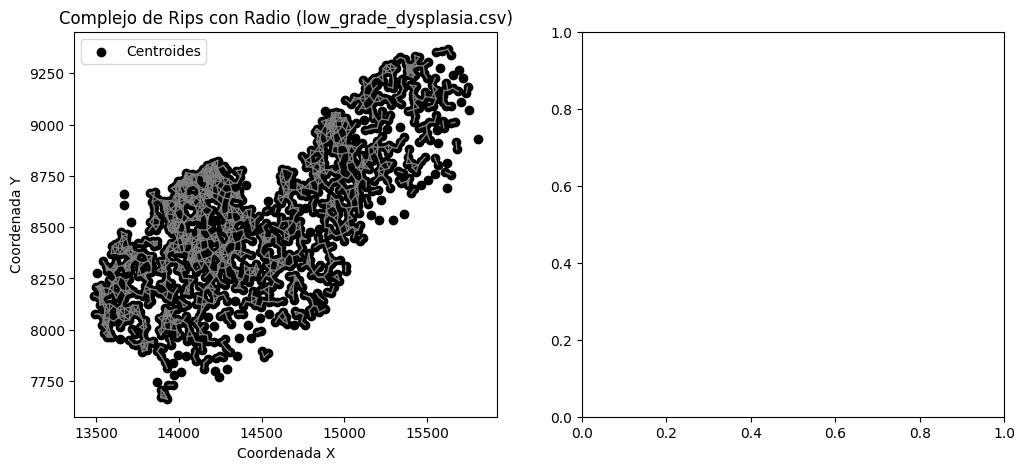

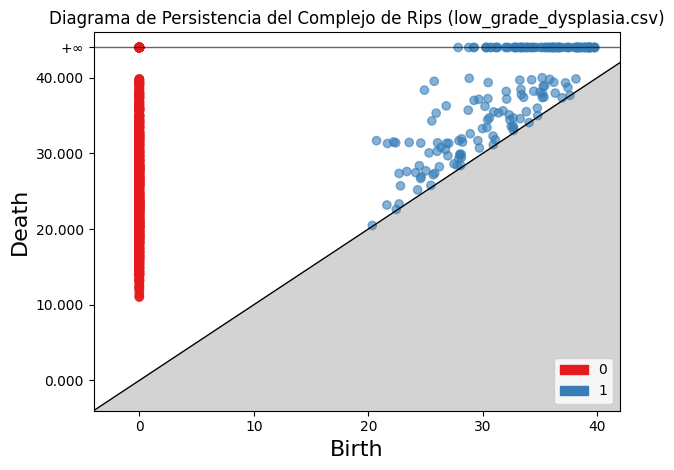

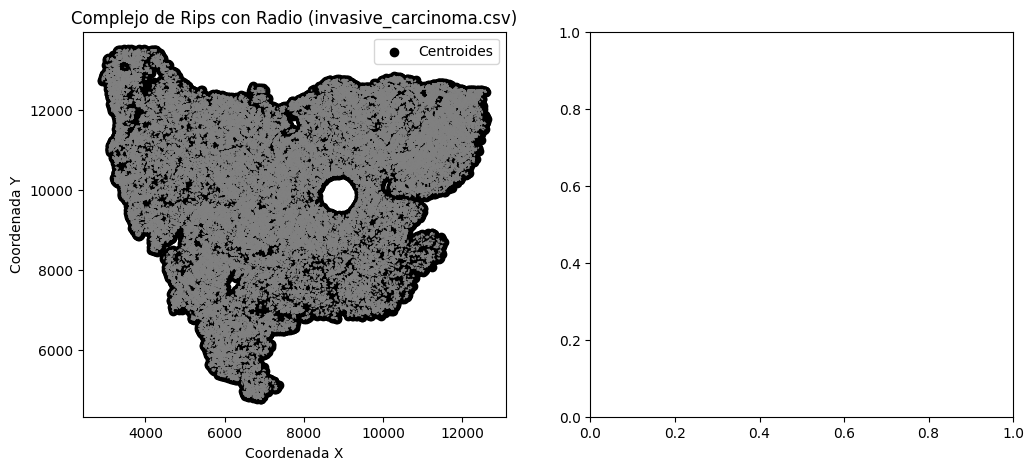

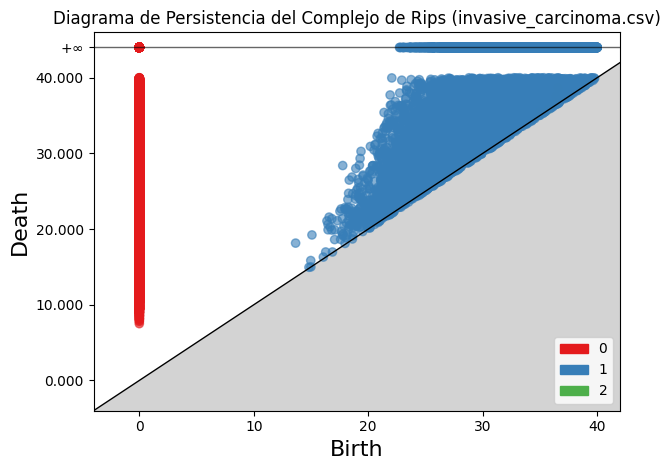

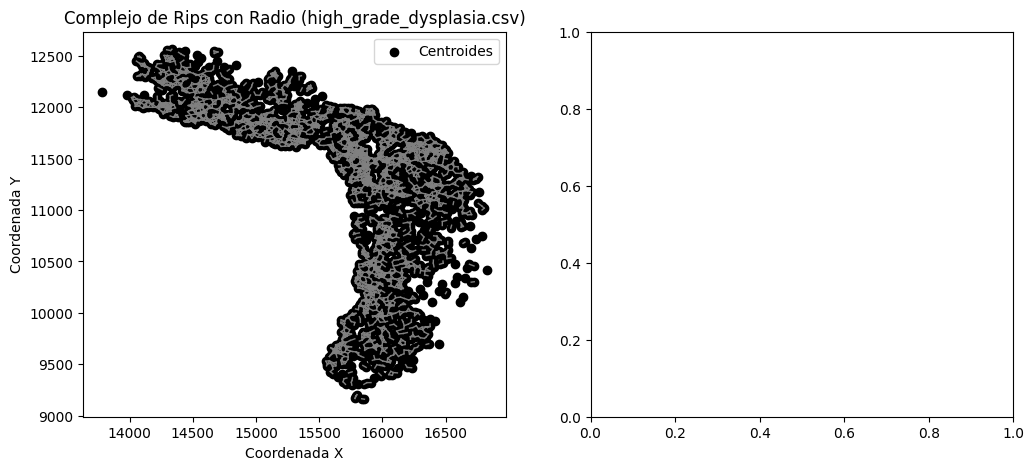

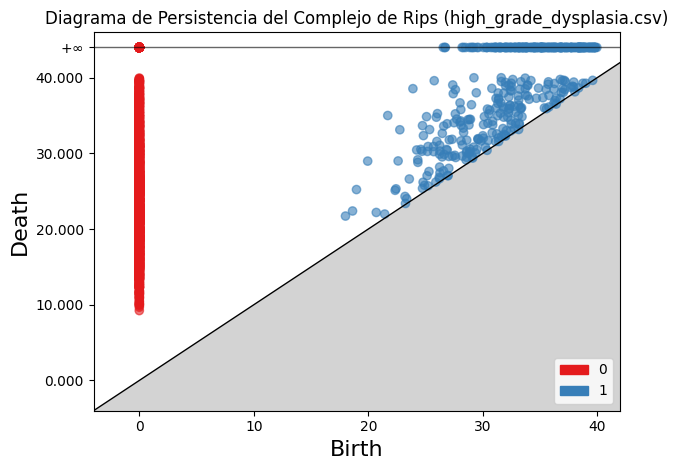

In [11]:
# Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-alumno15/Celulas_cancer/carpeta_csv"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa)
    nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
    df.columns = nombres_columnas
    
    # Extraer las coordenadas de los centroides
    X = df['X_centroid']
    Y = df['Y_centroid']
    
    # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
    puntos = np.array(list(zip(X, Y)))

    # Calcular el complejo de Rips con un radio específico
    rips_complex = gd.RipsComplex(points=puntos, max_edge_length=40)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

    # Visualizar el complejo de Rips
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, color='black', label='Centroides')
    for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
        if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
            arista = simplex[0]
            x = [X[i] for i in arista]
            y = [Y[i] for i in arista]
            plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title(f'Complejo de Rips con Radio ({archivo_csv})')
    plt.legend()

    # Calcular el diagrama de persistencia
    diag = simplex_tree.persistence()

    # Mostrar el diagrama de dispersión de persistencia
    plt.subplot(1, 2, 2)
    gd.plot_persistence_diagram(diag)
    plt.title(f'Diagrama de Persistencia del Complejo de Rips ({archivo_csv})')
    plt.xlabel('Birth')
    plt.ylabel('Death')

    plt.tight_layout()
    plt.show()


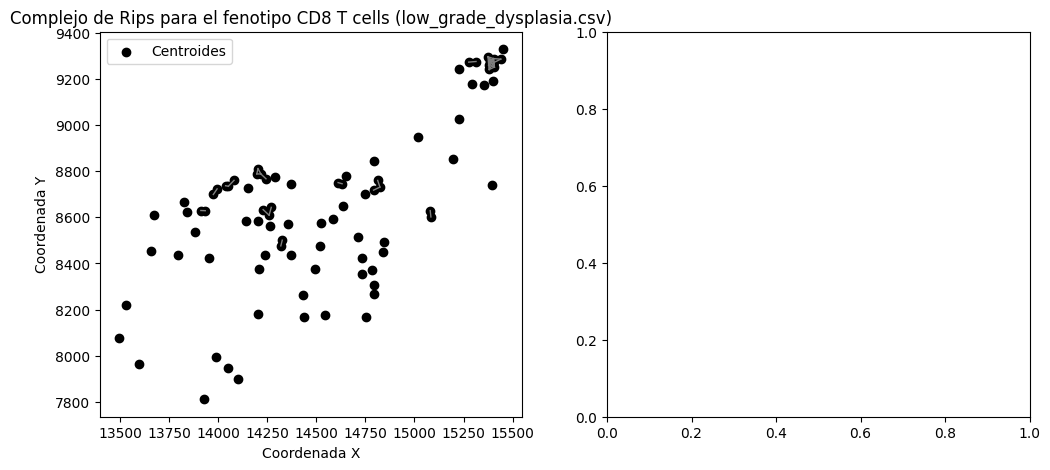

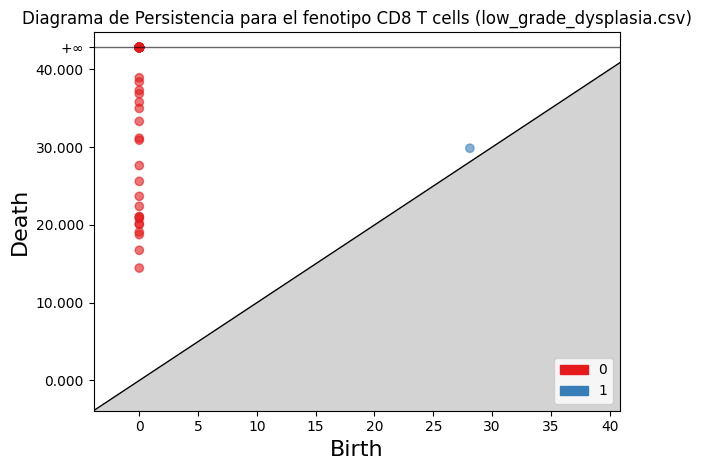

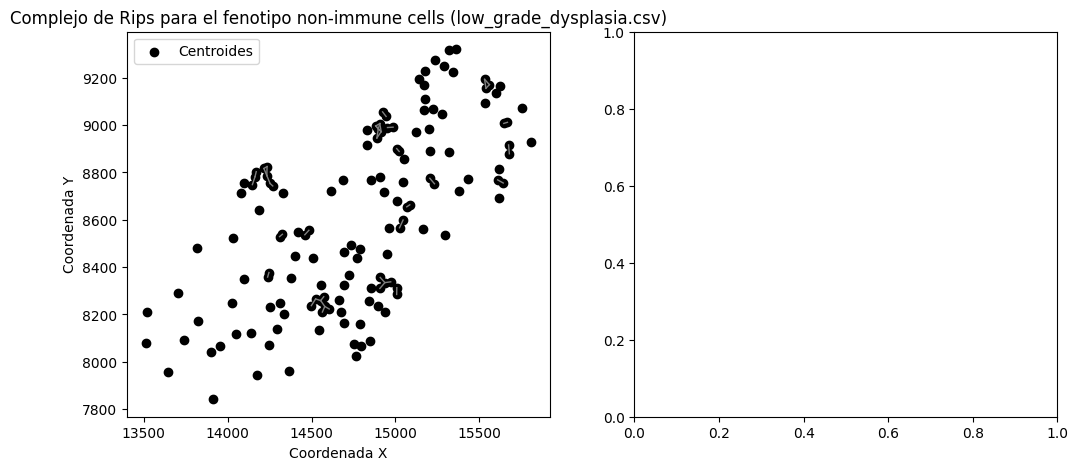

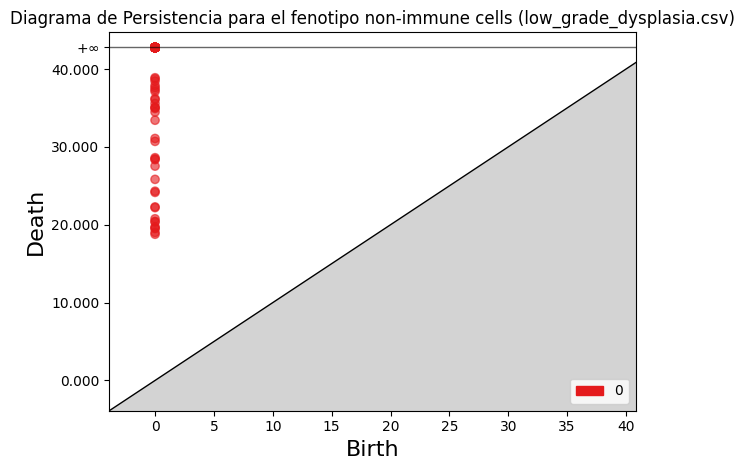

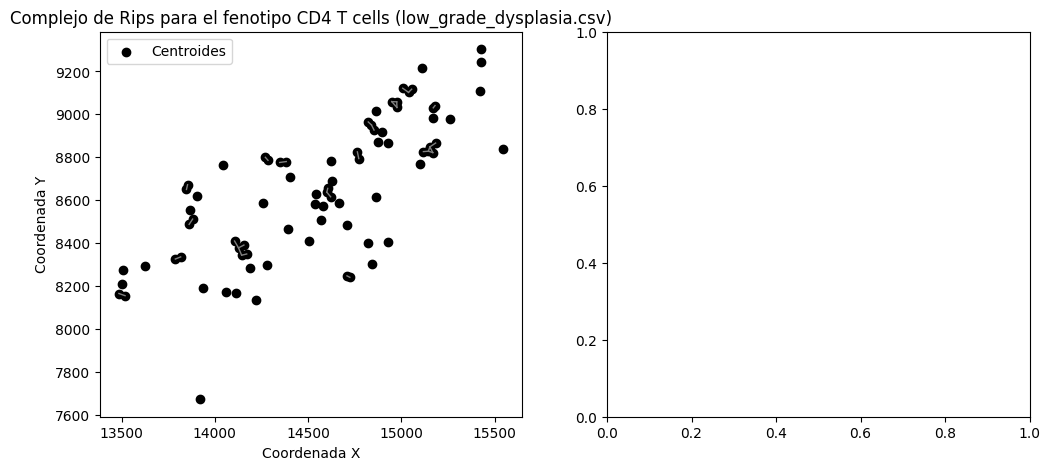

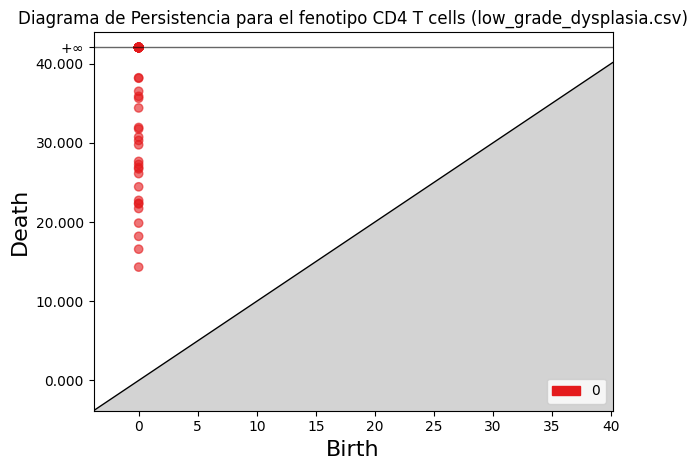

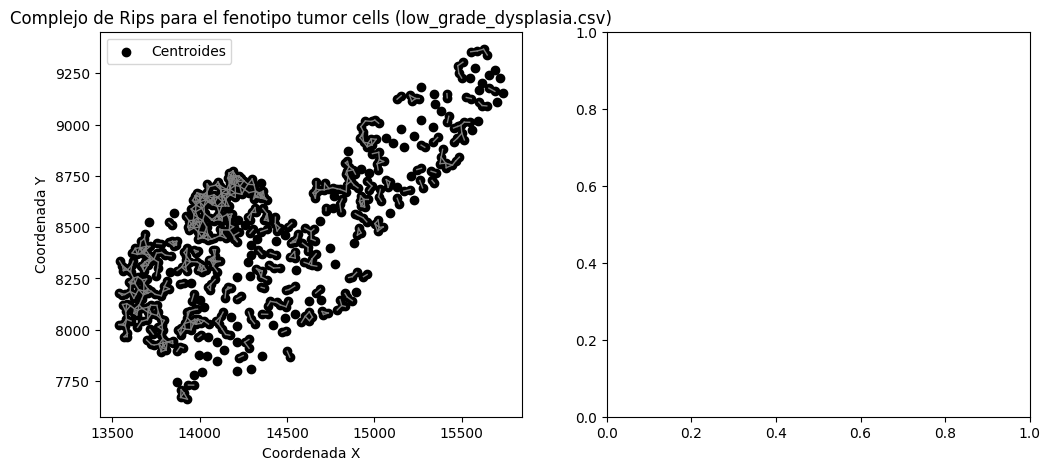

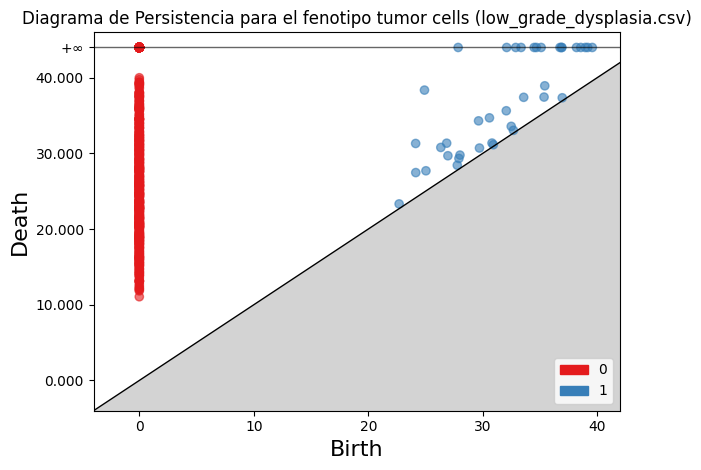

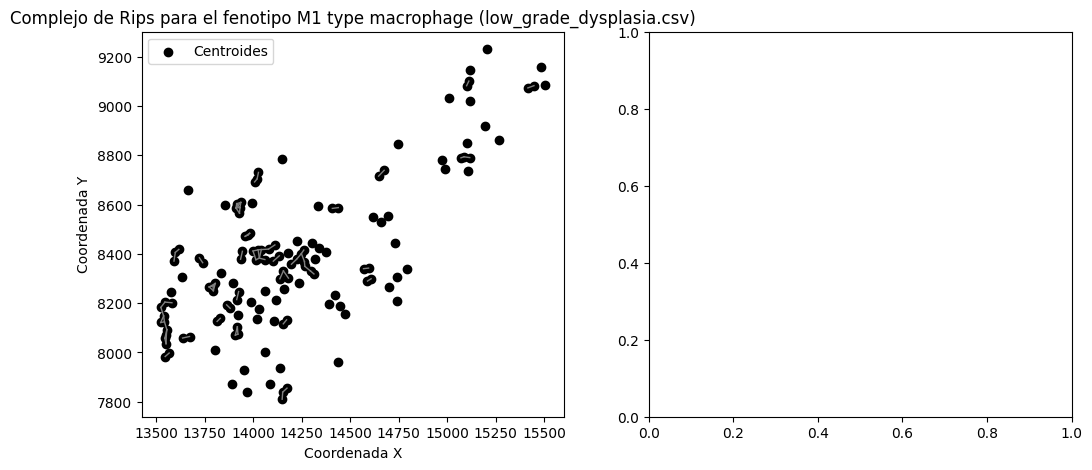

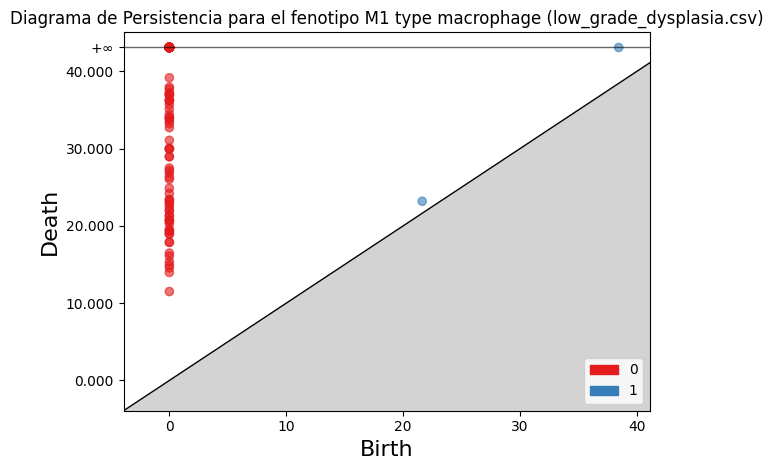

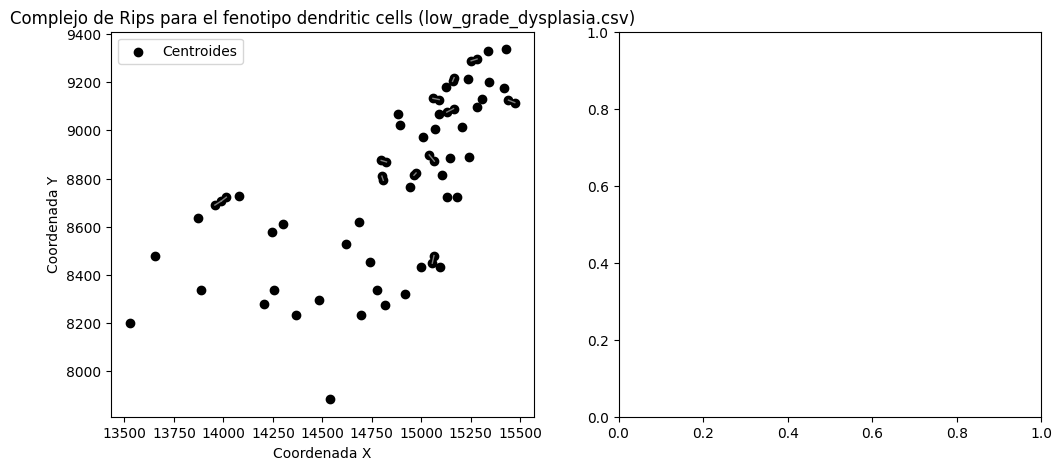

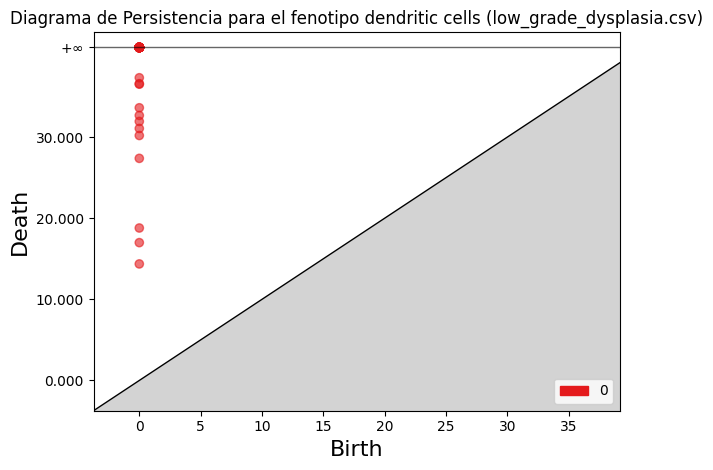

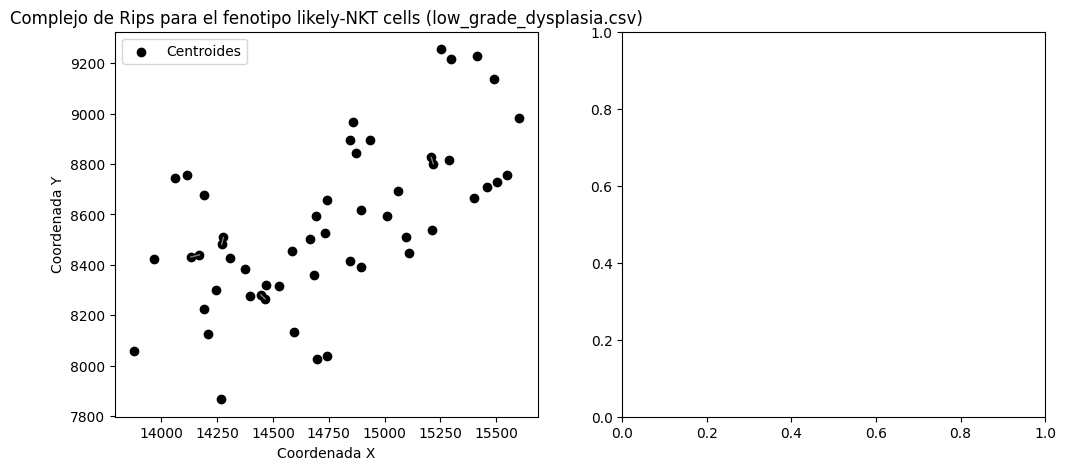

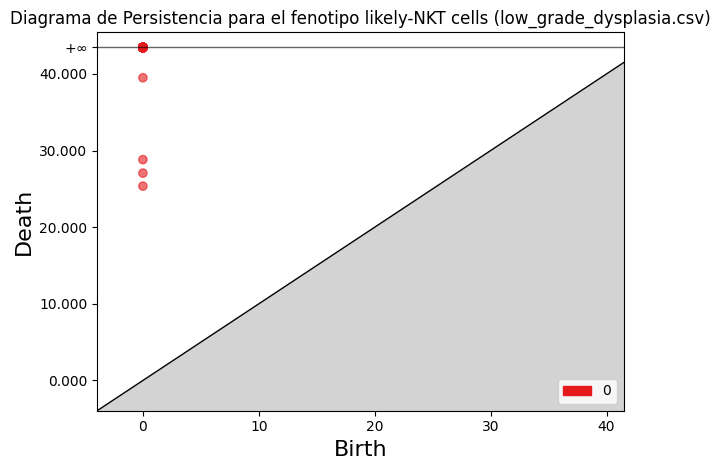

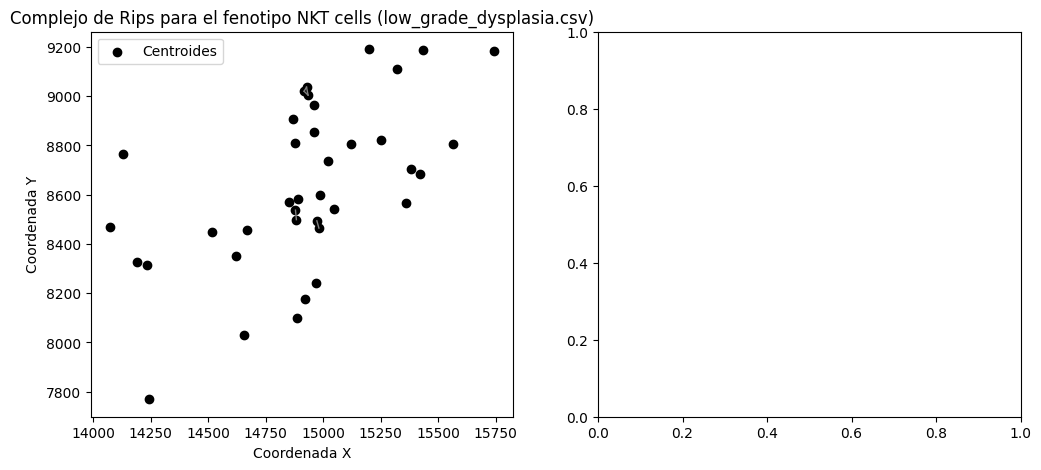

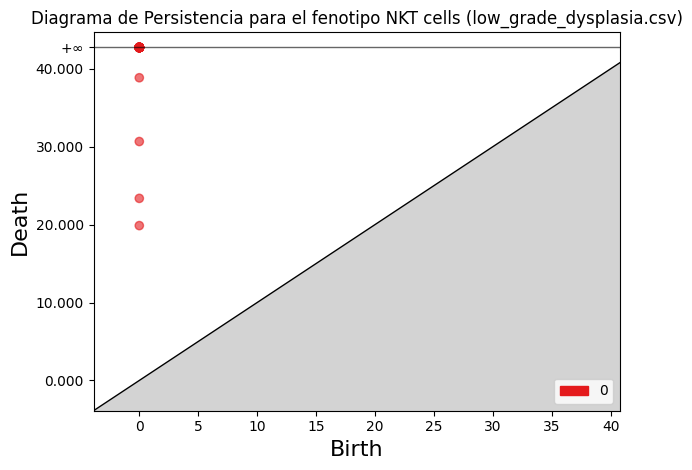

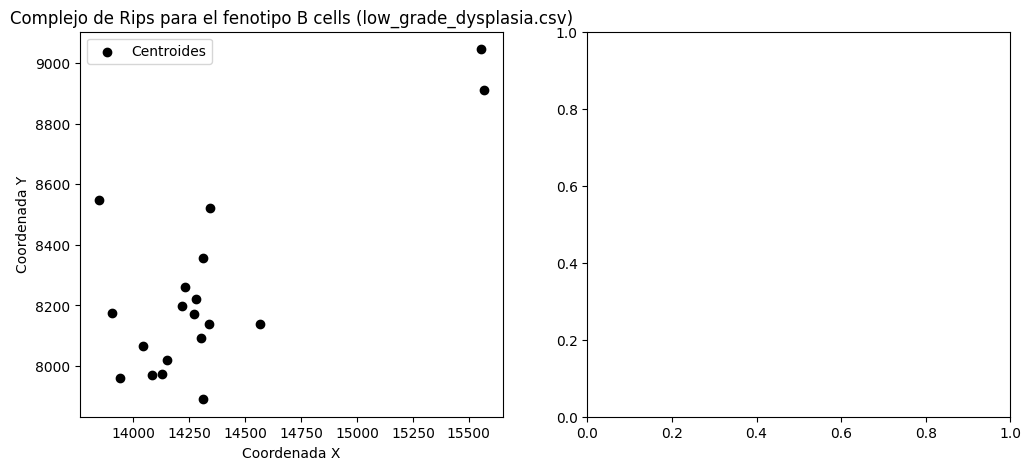

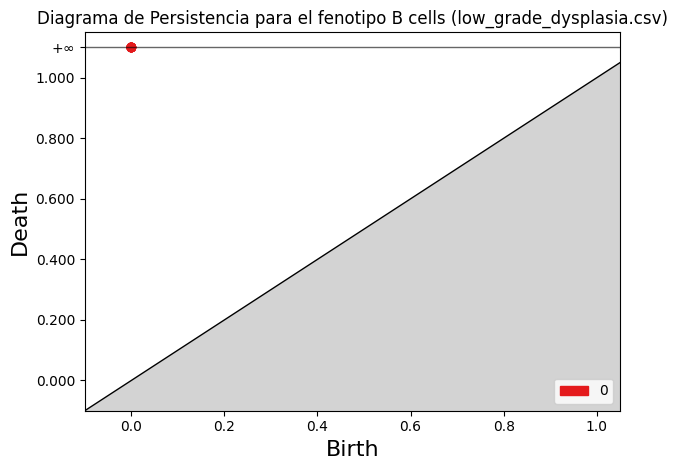

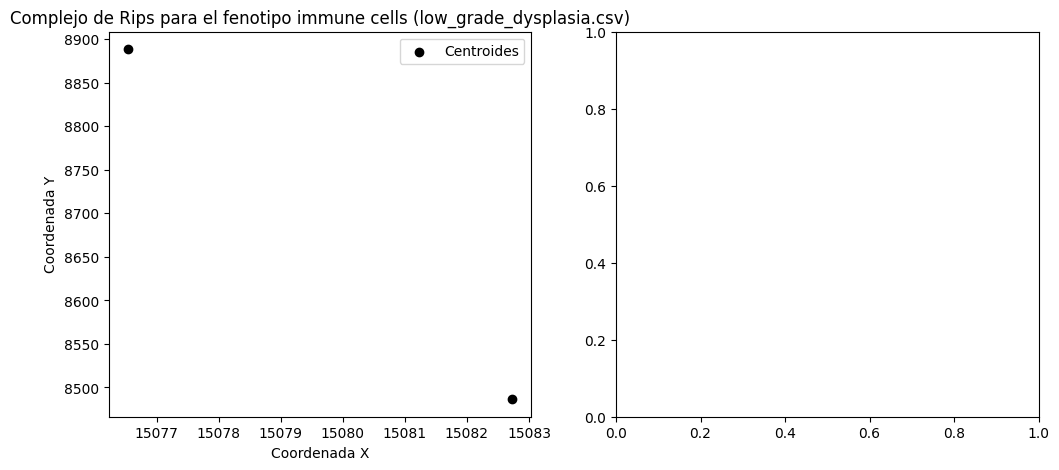

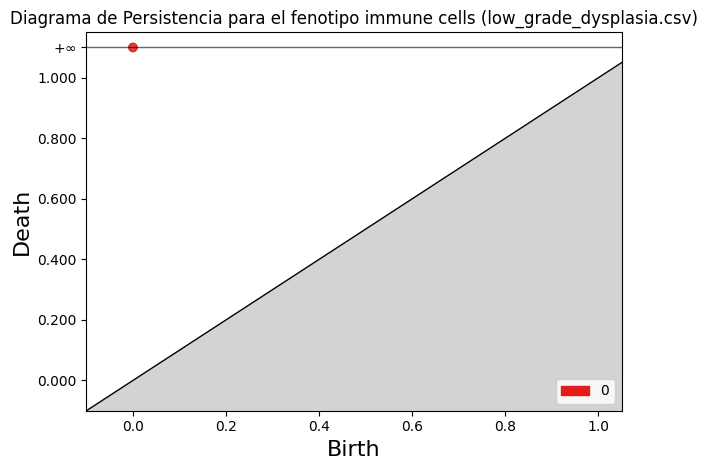

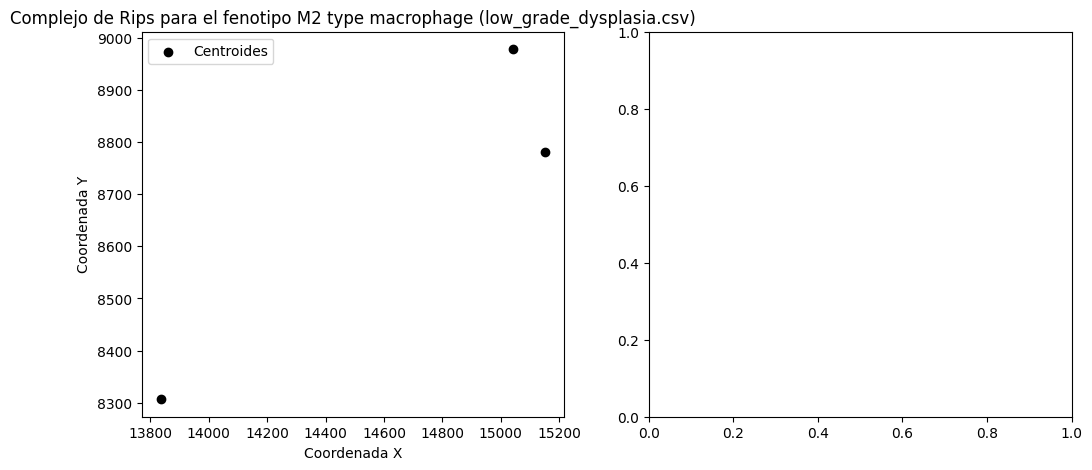

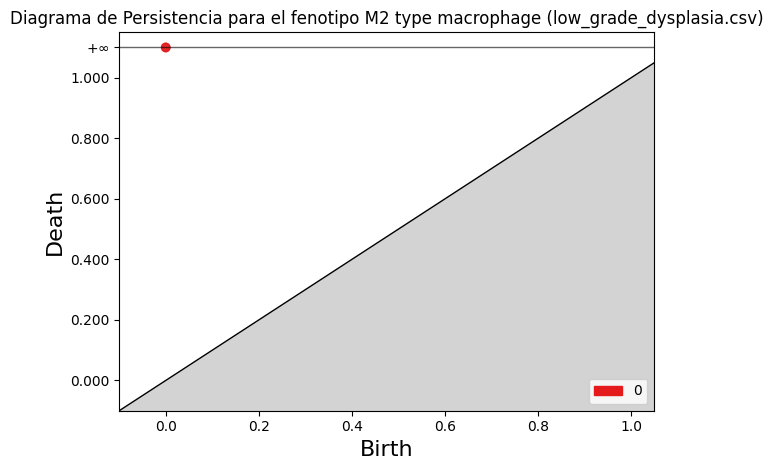

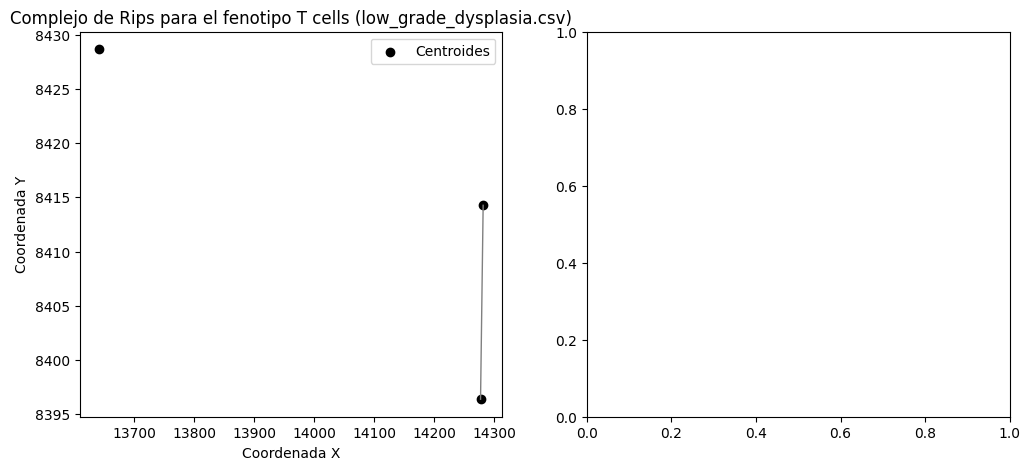

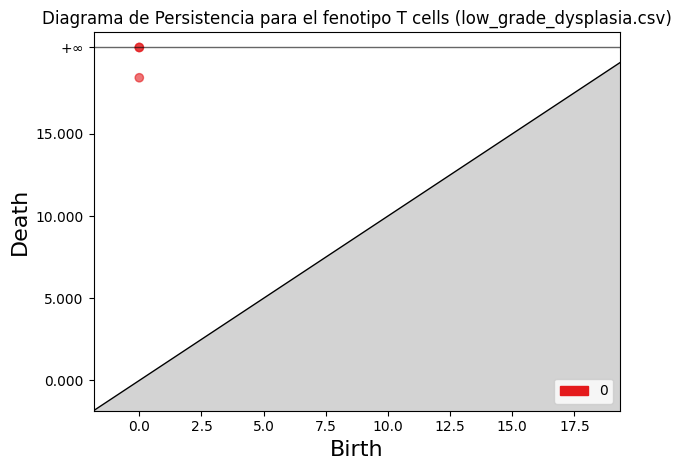

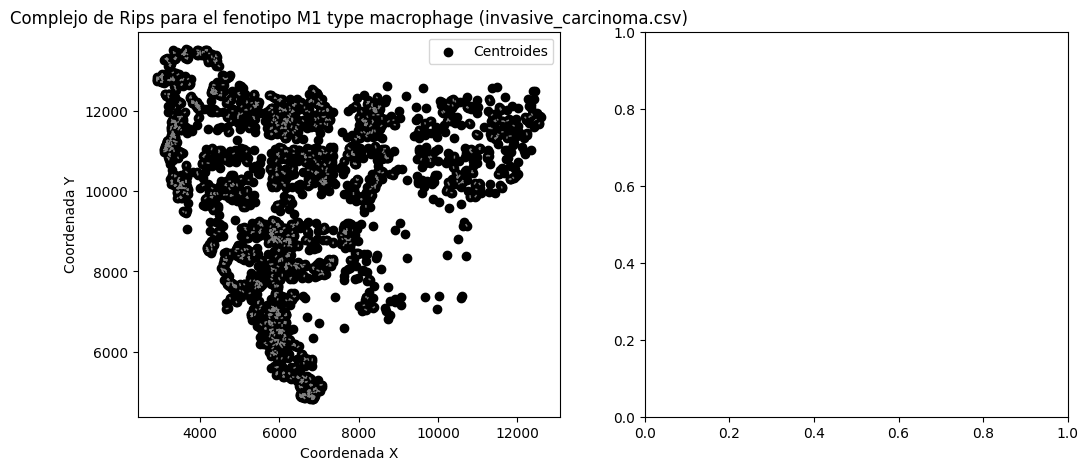

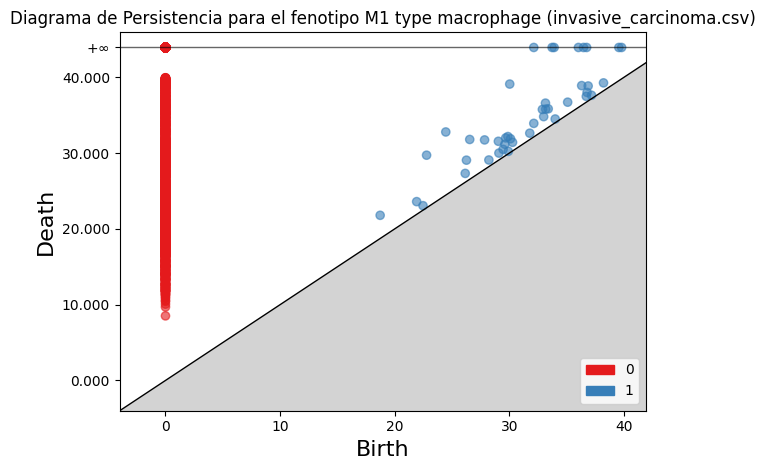

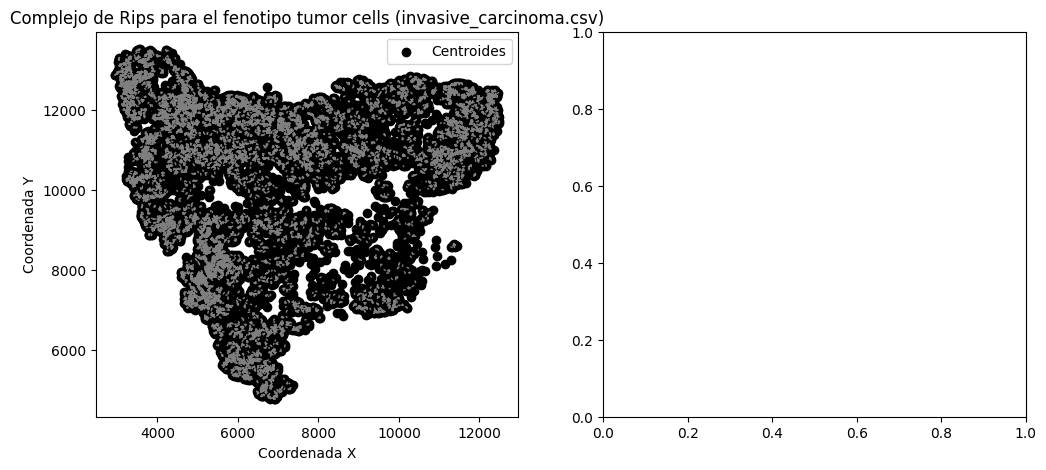

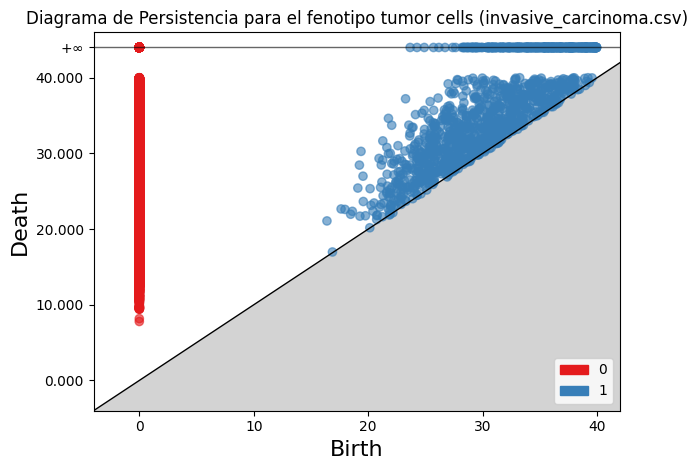

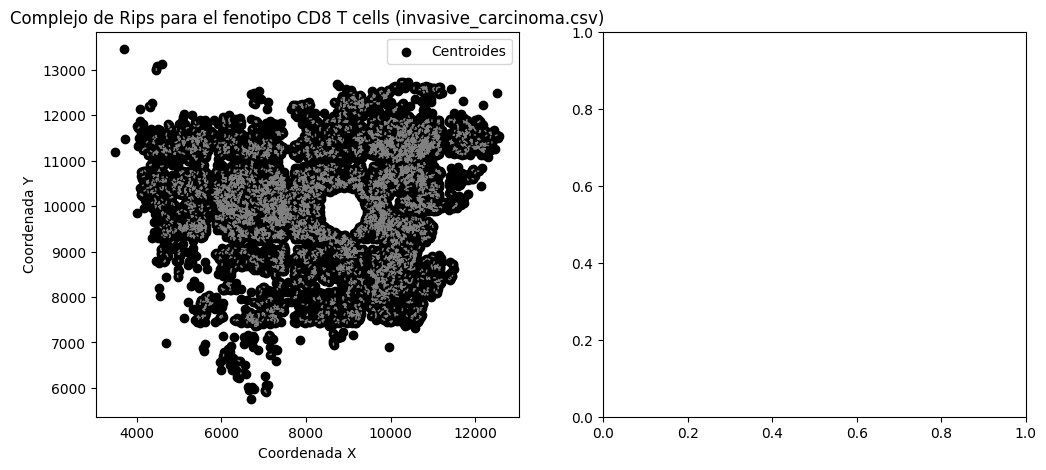

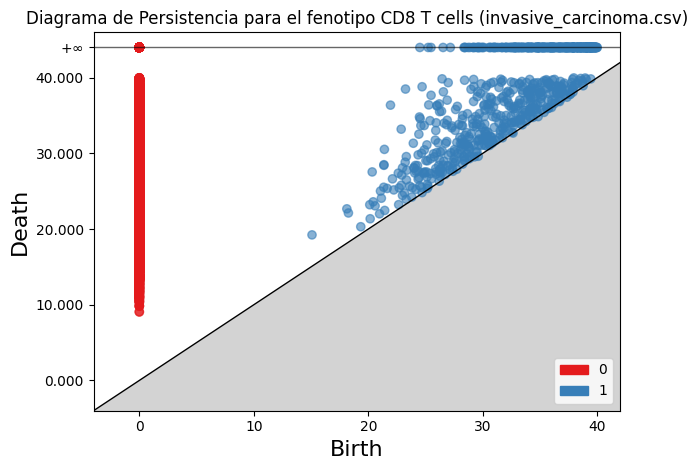

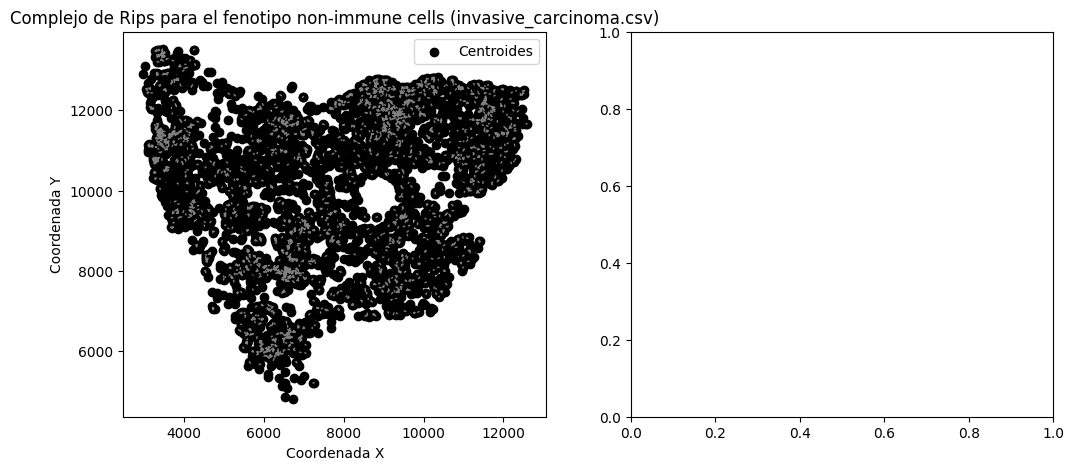

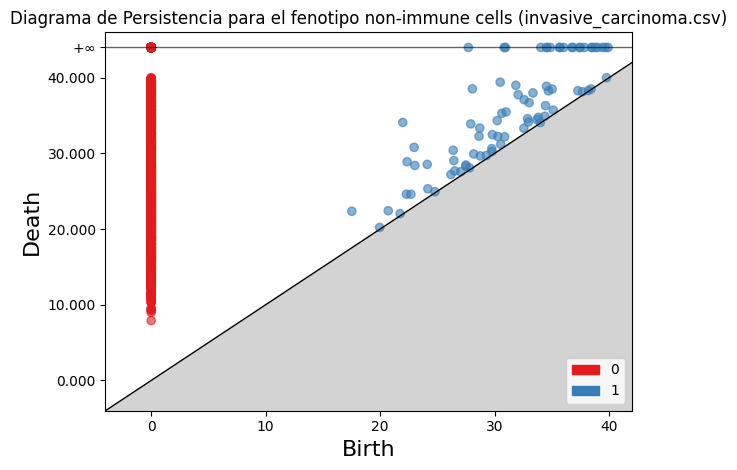

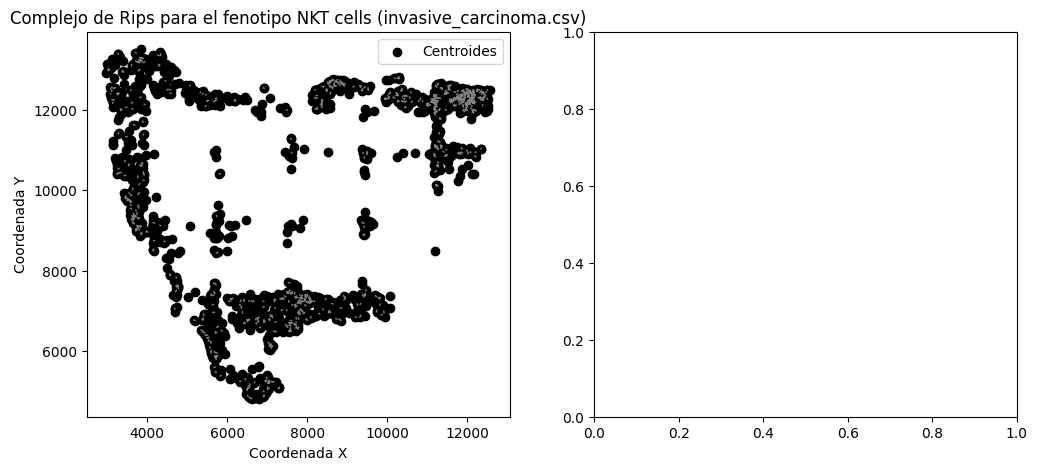

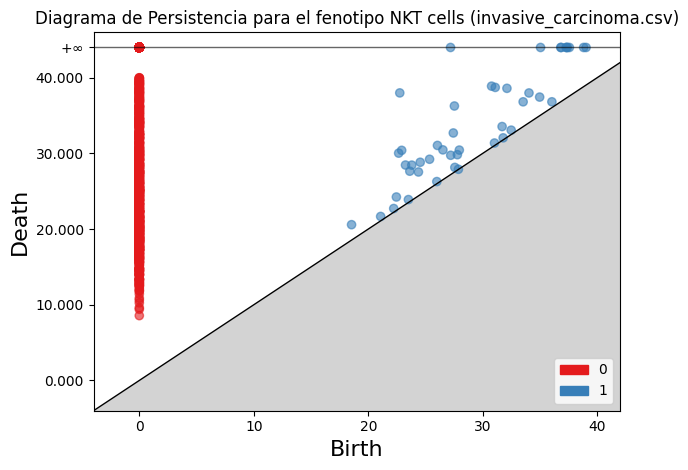

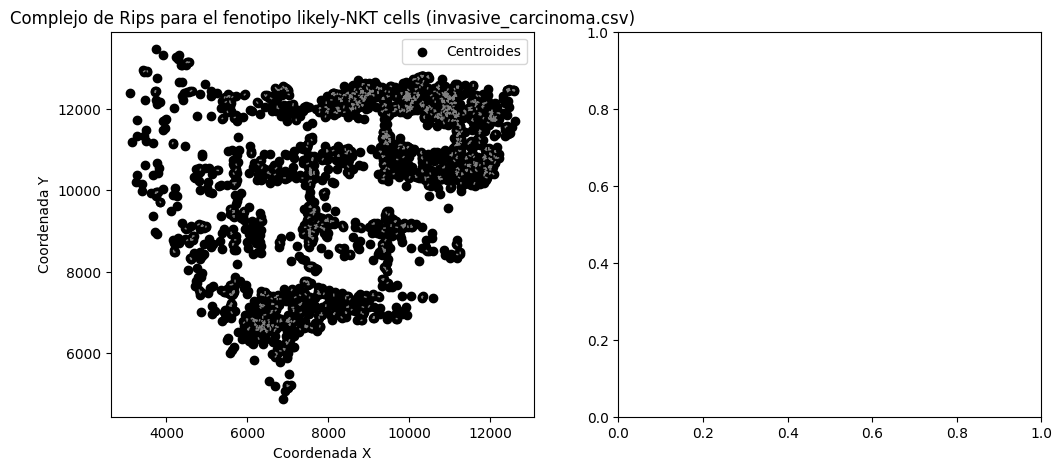

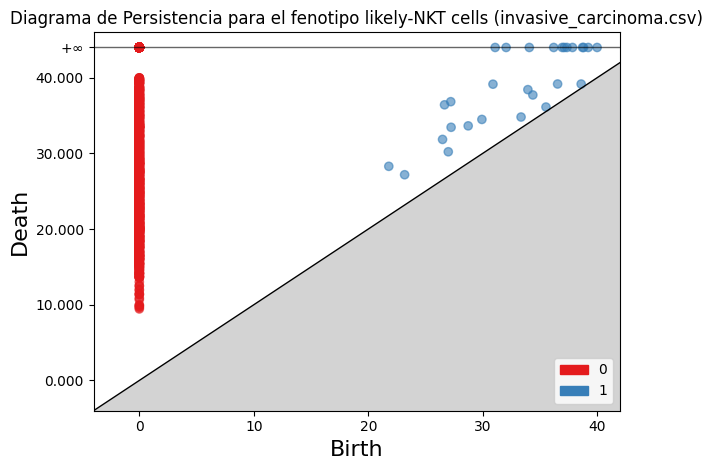

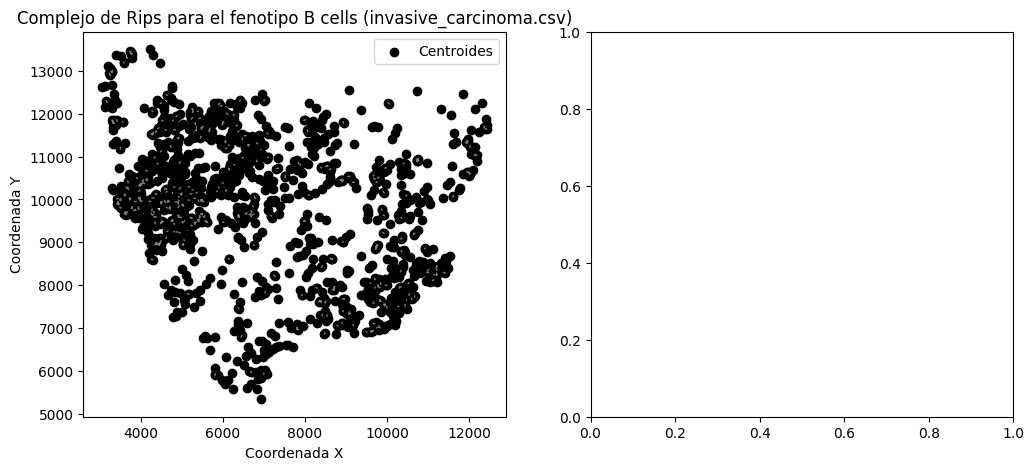

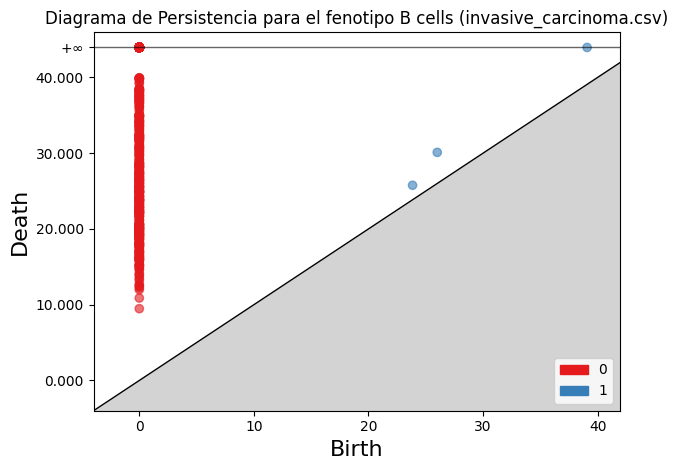

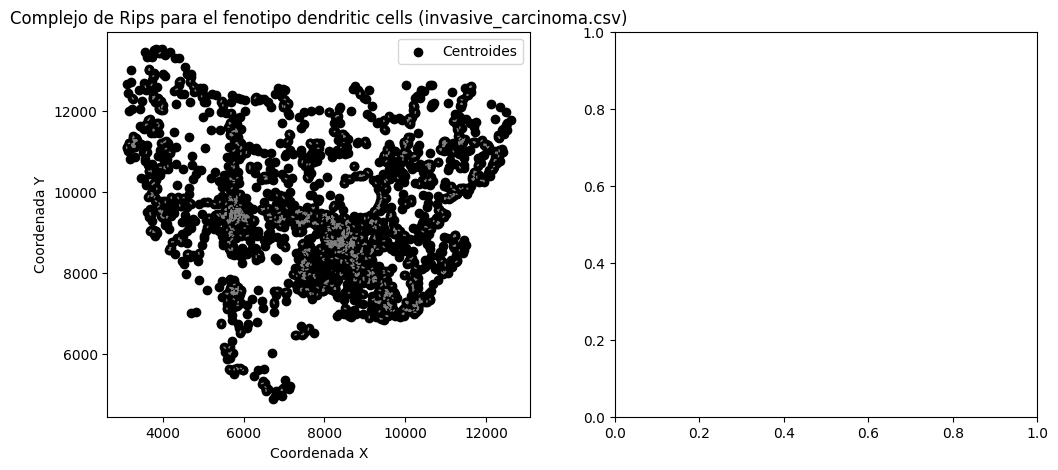

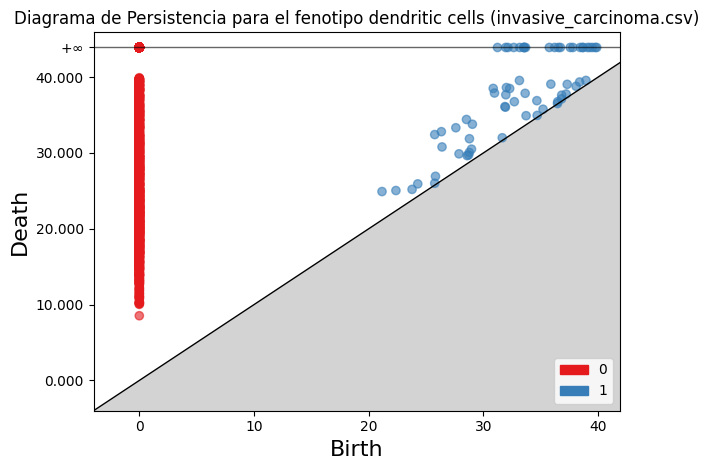

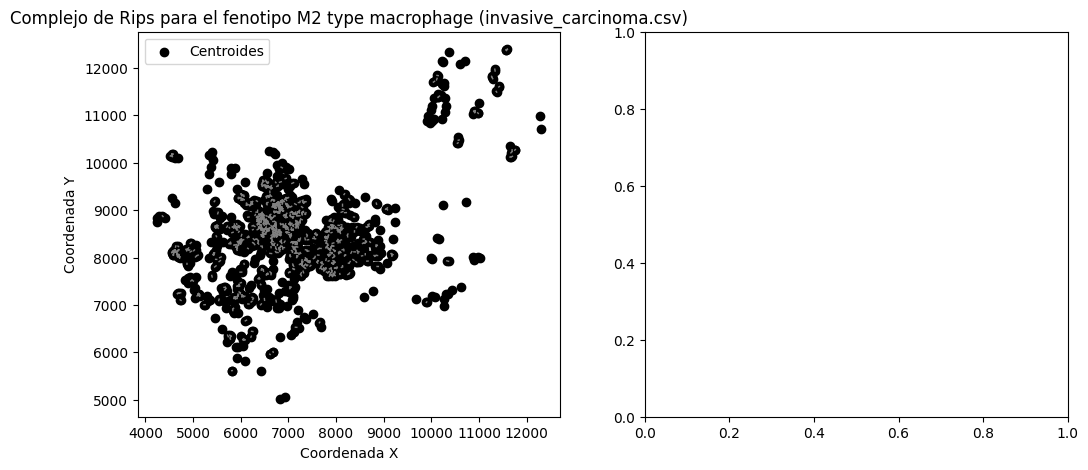

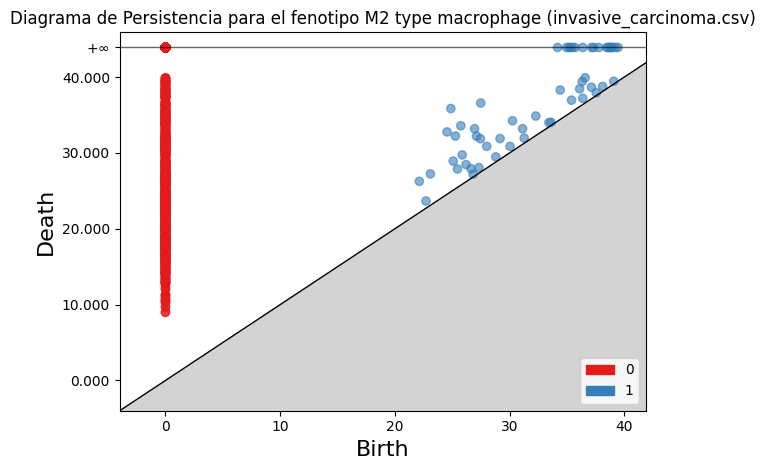

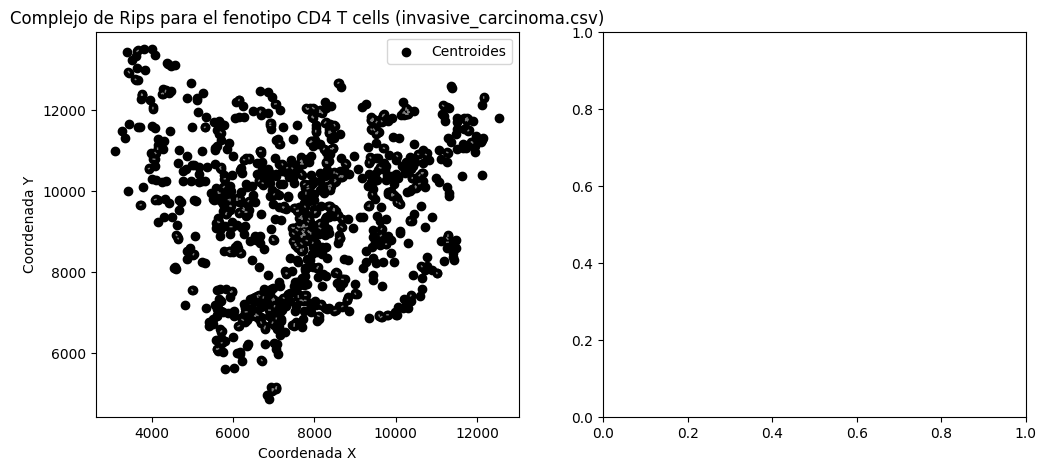

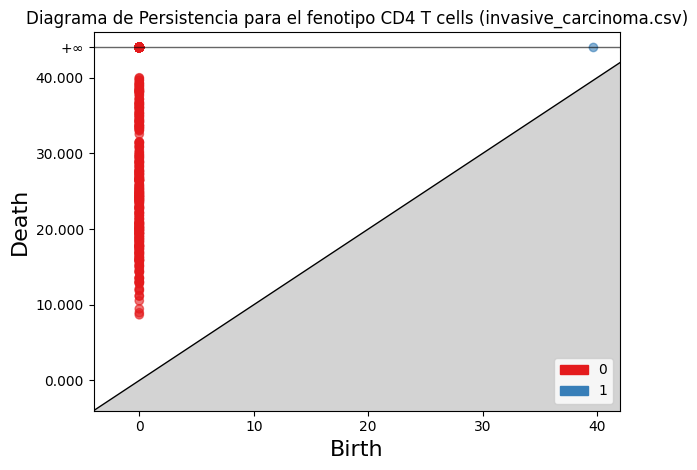

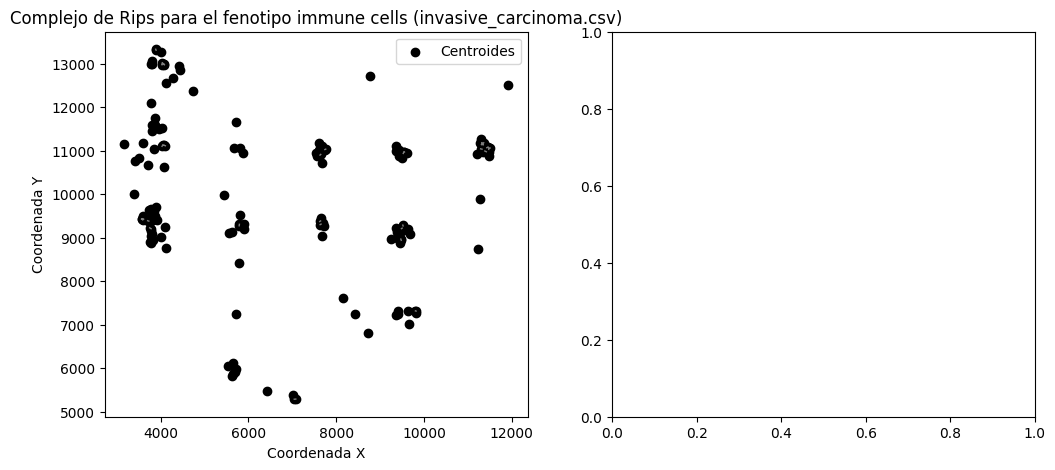

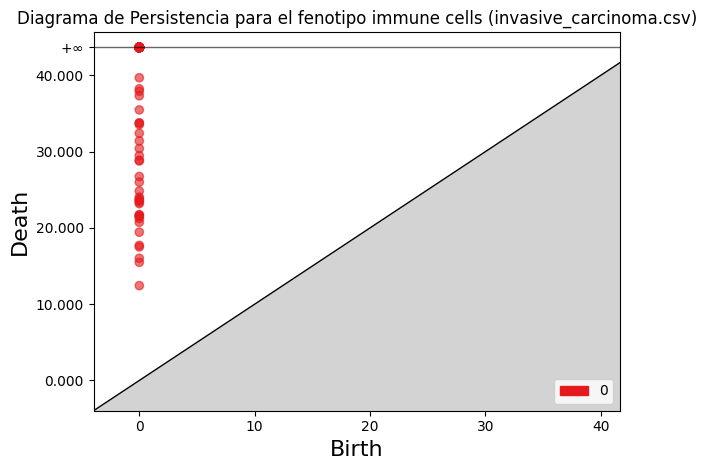

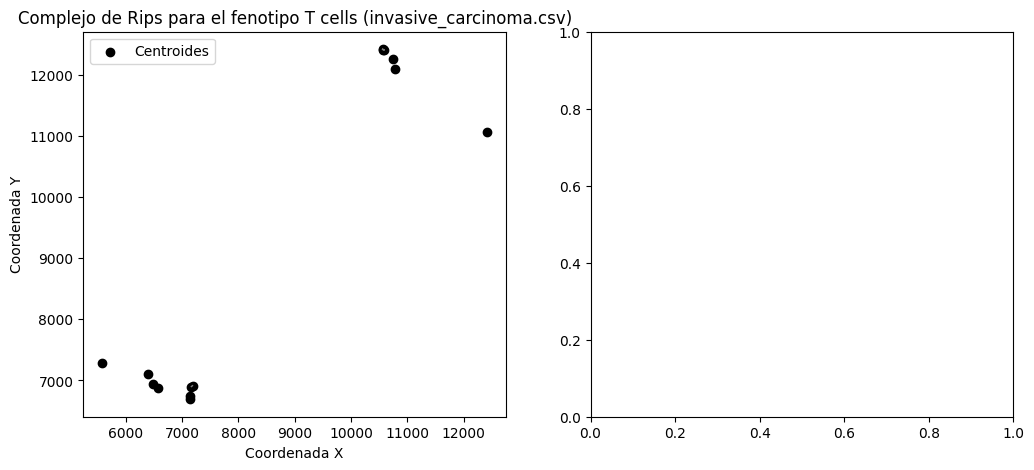

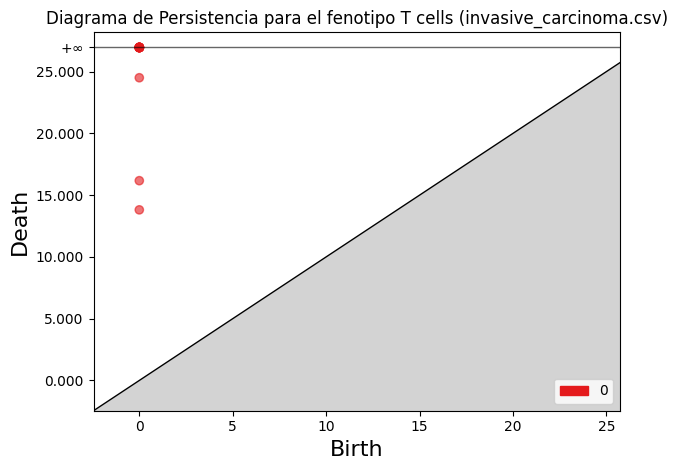

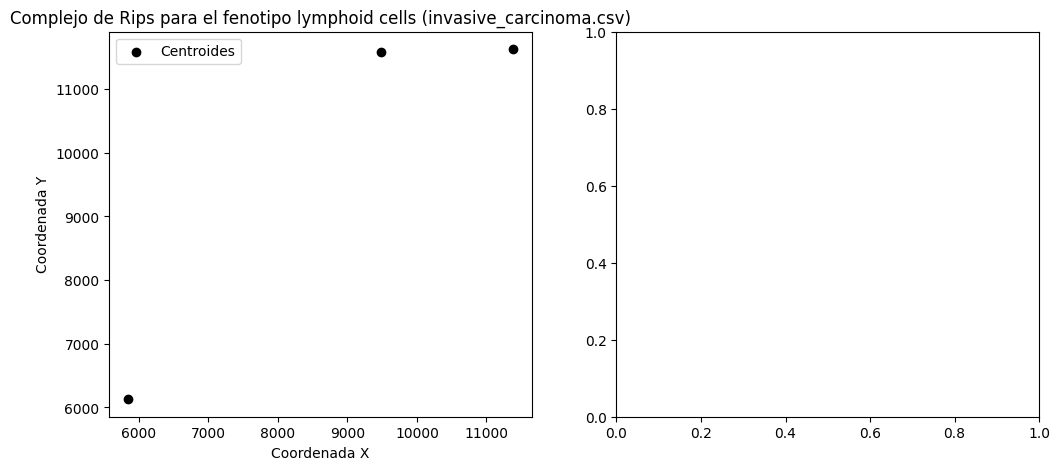

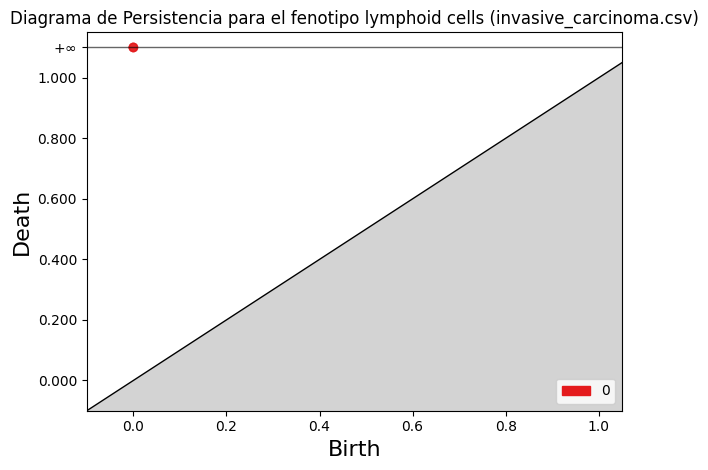

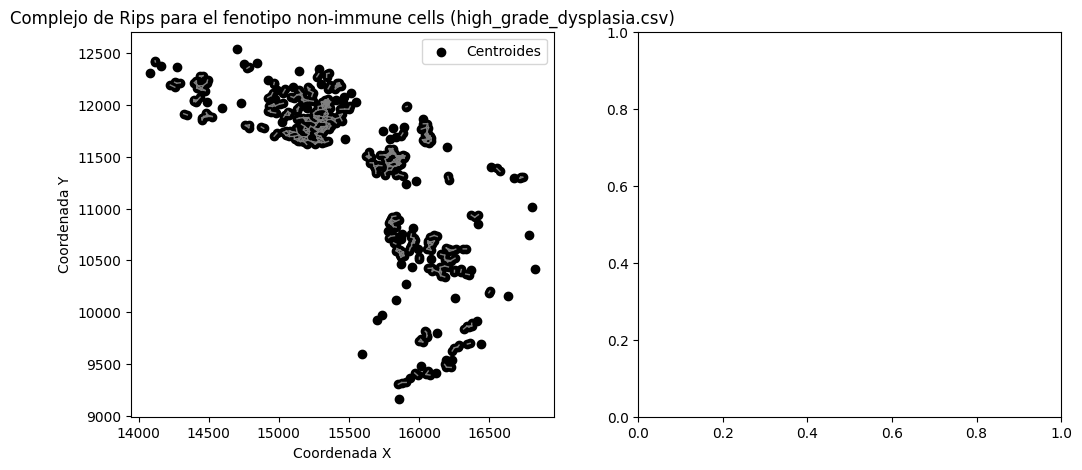

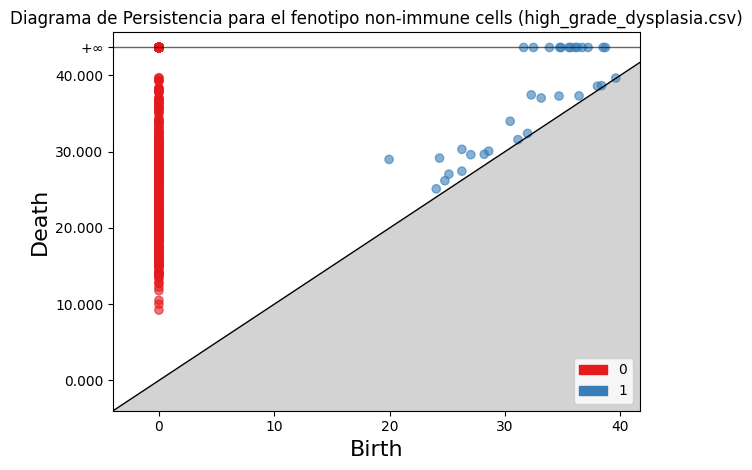

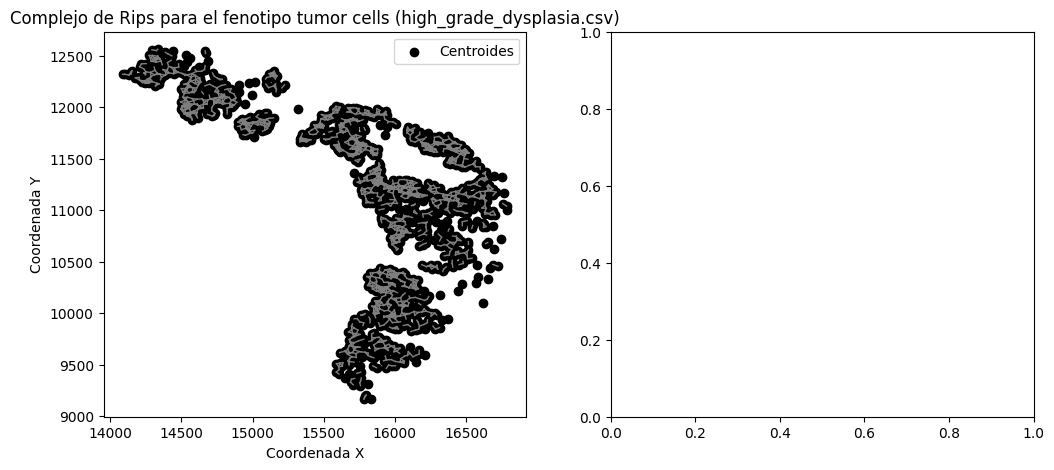

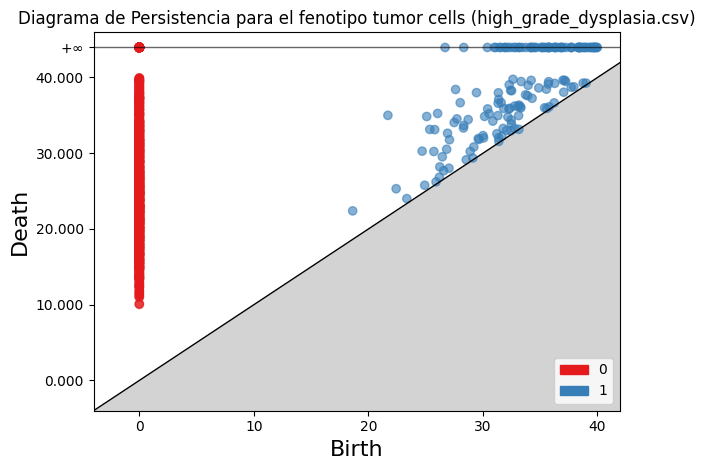

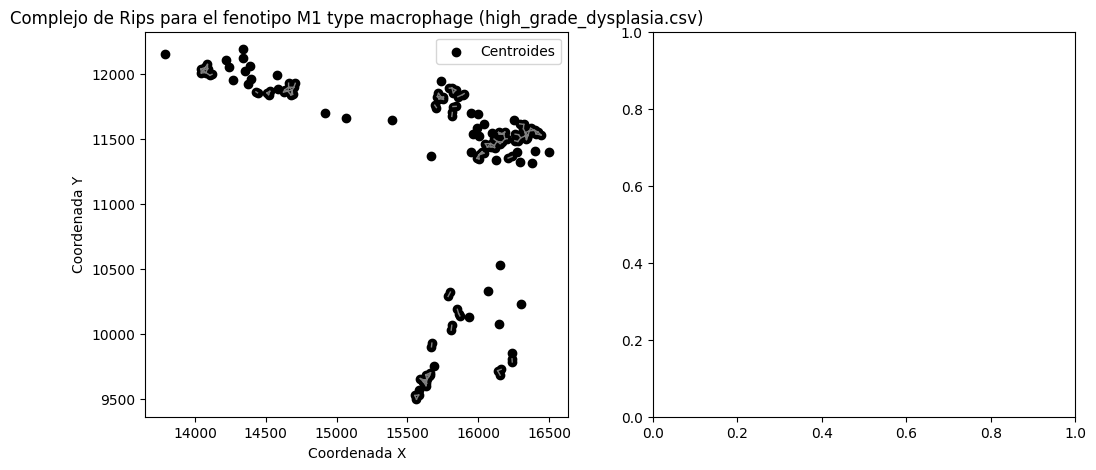

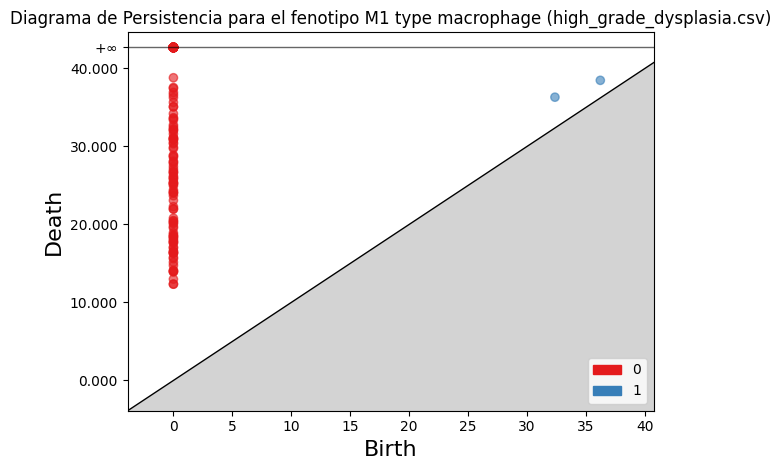

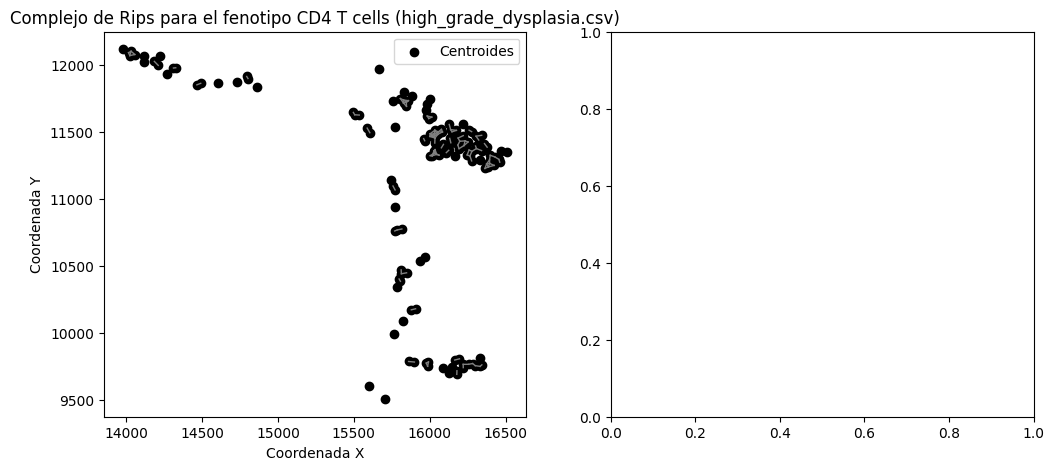

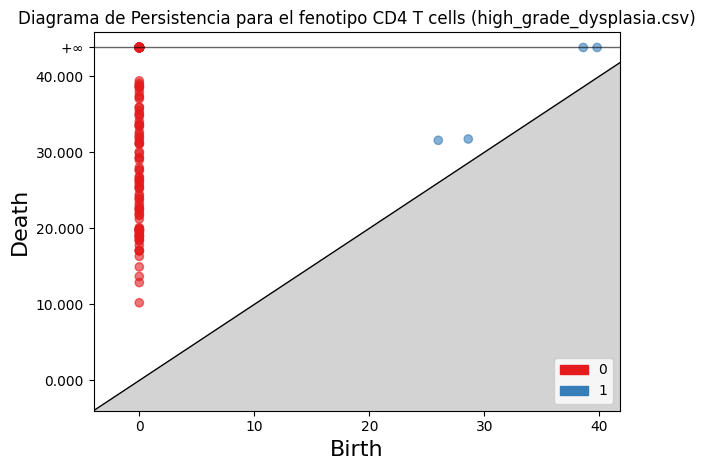

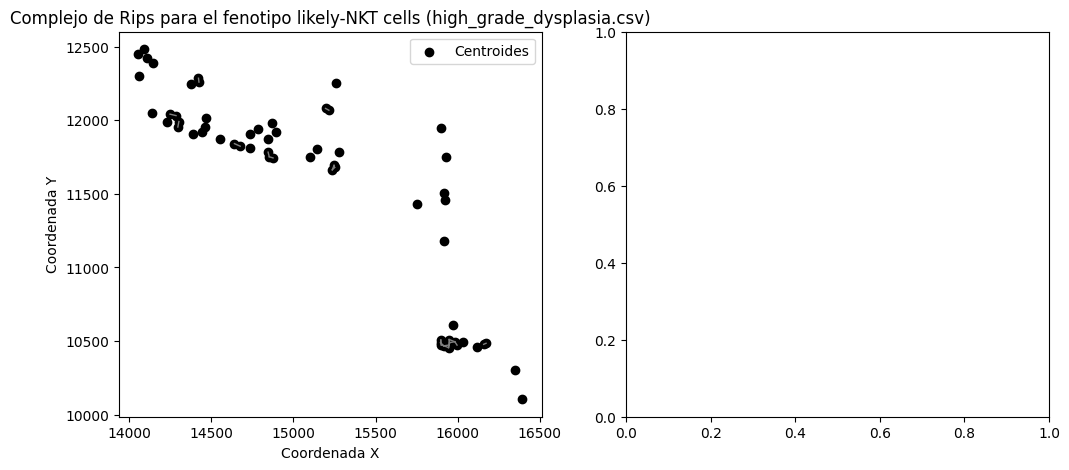

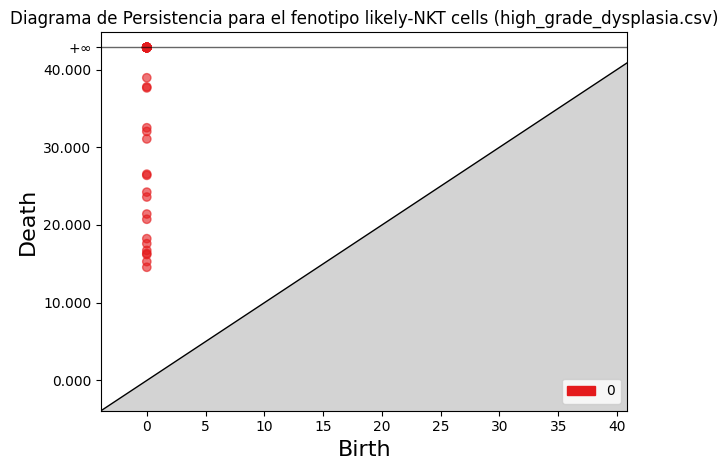

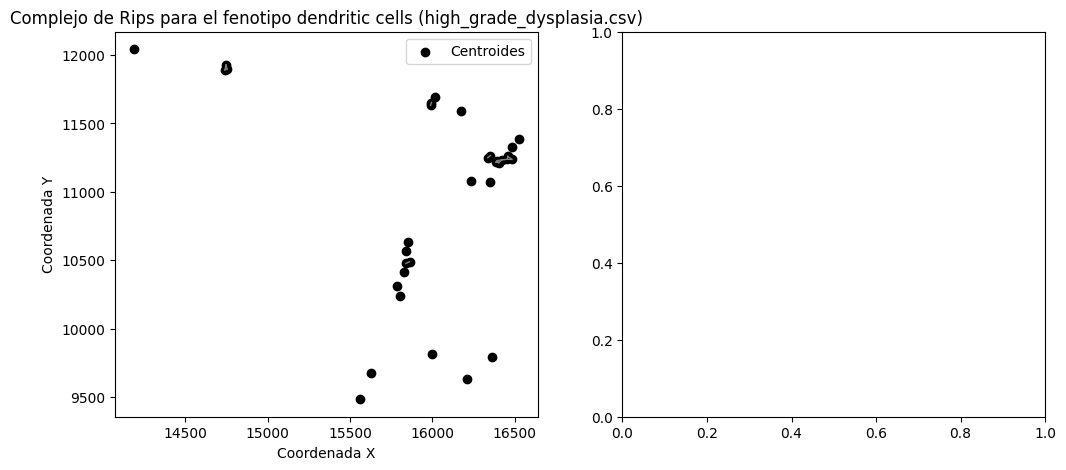

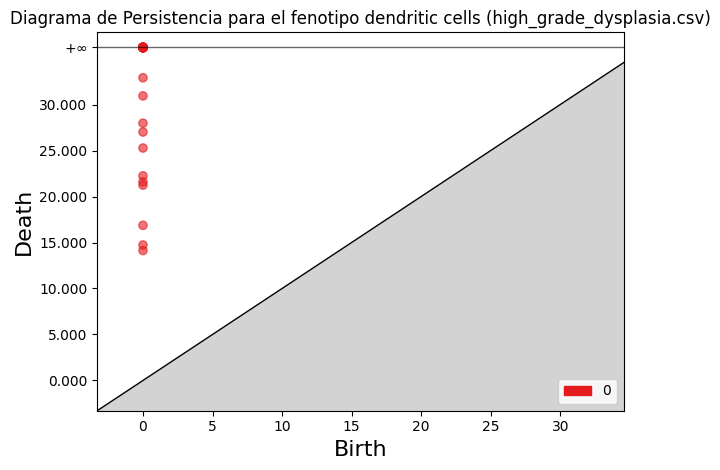

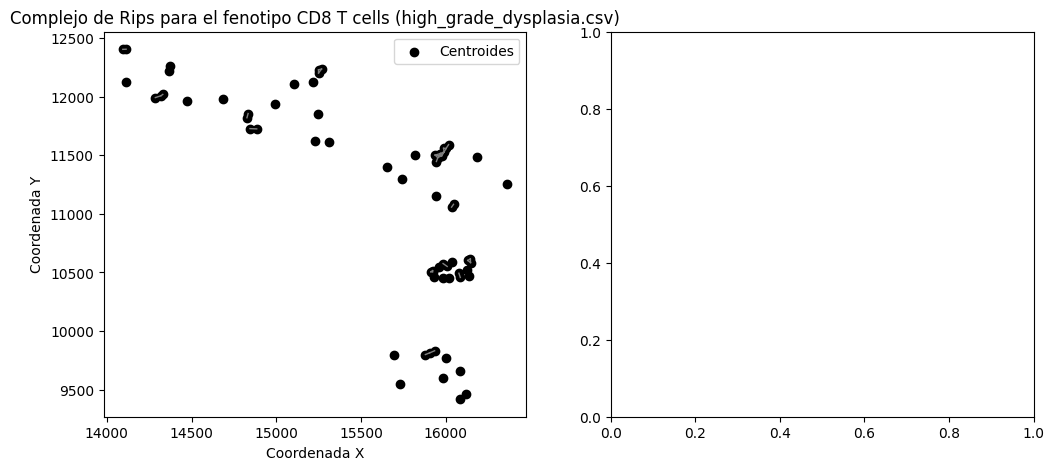

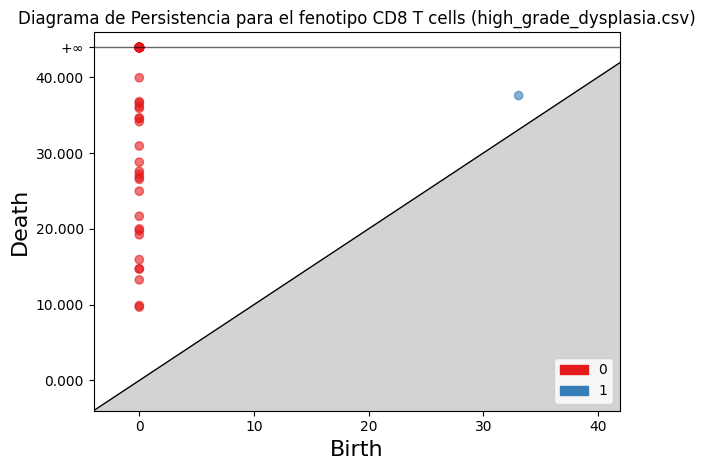

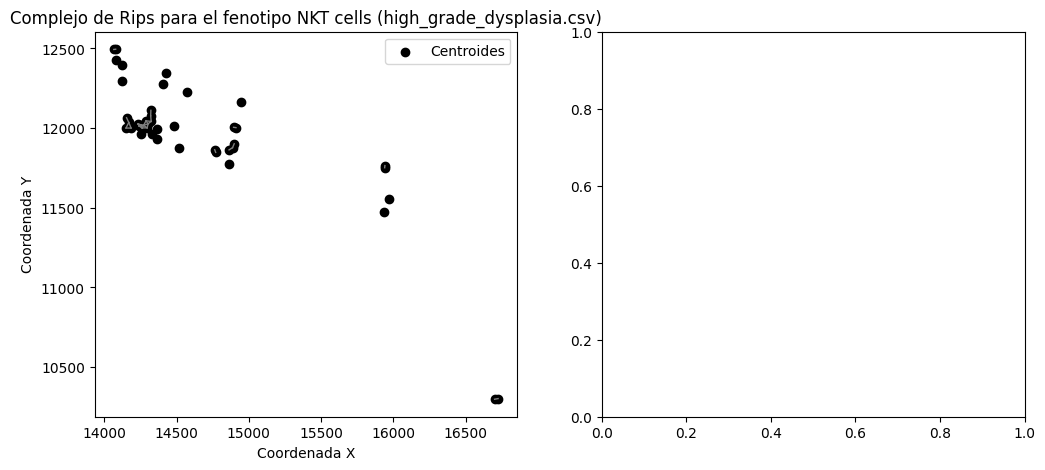

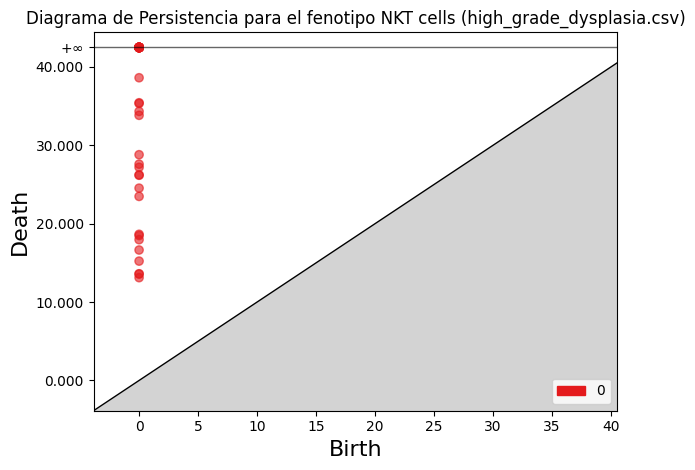

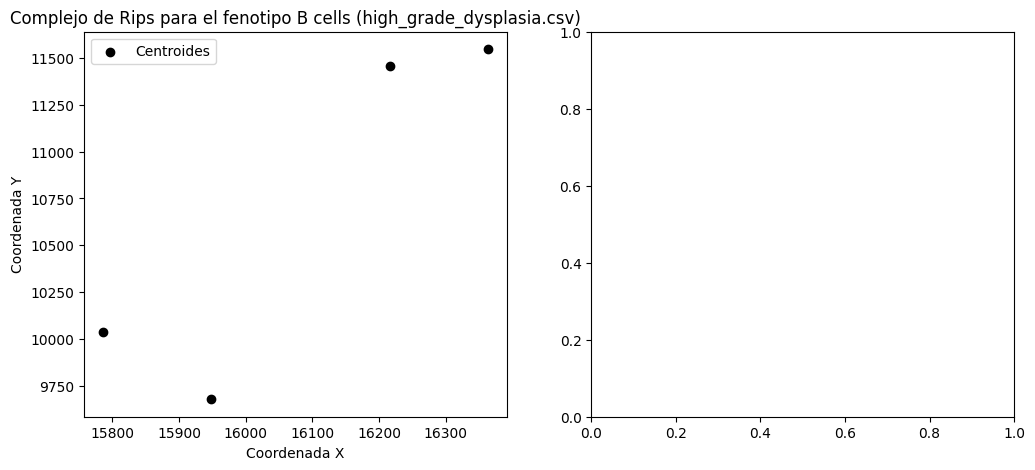

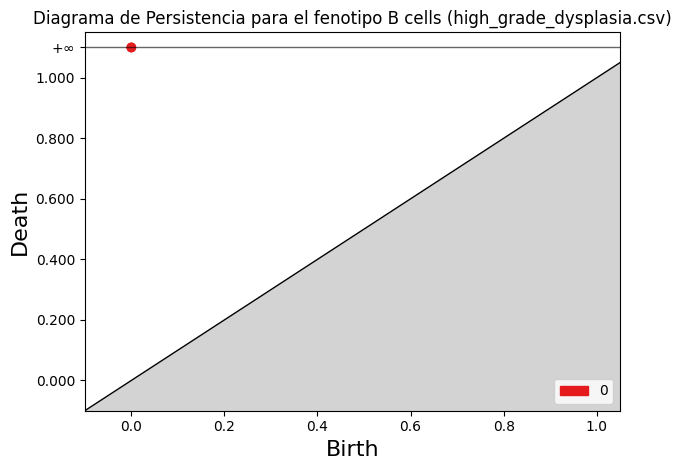

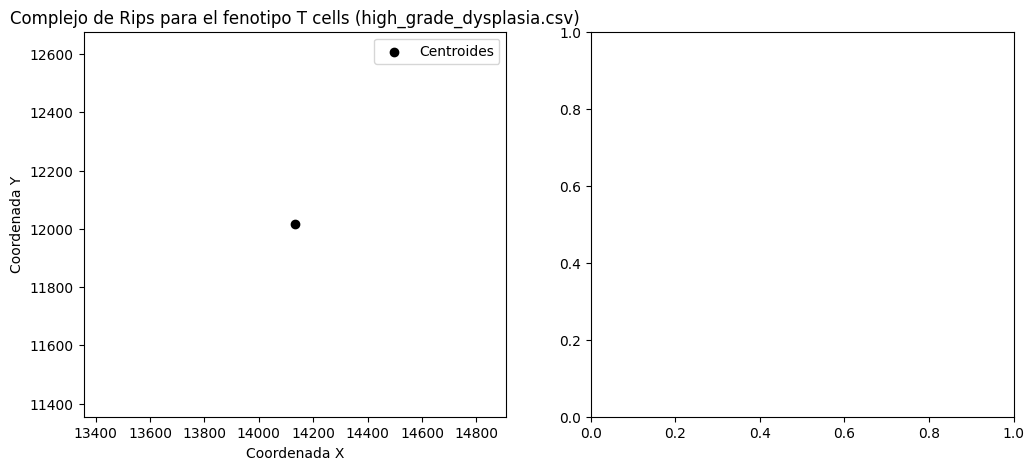

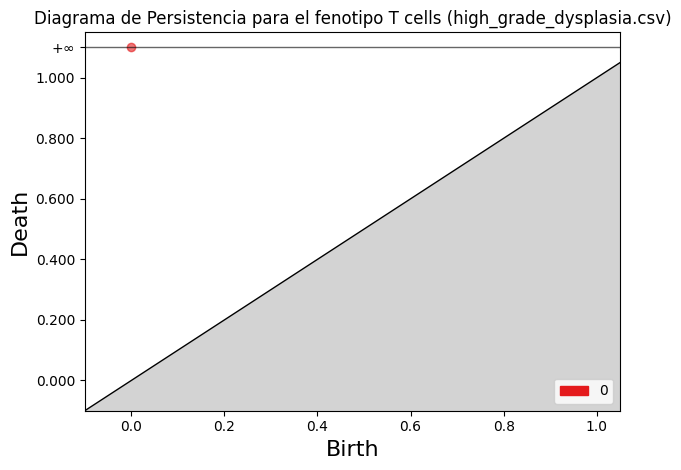

In [12]:
# Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-alumno15/Celulas_cancer/carpeta_csv"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa)
    nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
    df.columns = nombres_columnas
    
    # Obtener lista de fenotipos únicos
    fenotipos_unicos = df['phenotype'].unique()
    
    # Iterar sobre cada fenotipo
    for fenotipo in fenotipos_unicos:
        # Filtrar células por fenotipo
        df_fenotipo = df[df['phenotype'] == fenotipo]
        X = df_fenotipo['X_centroid'].values
        Y = df_fenotipo['Y_centroid'].values
        
        # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
        puntos = np.array(list(zip(X, Y)))

        # Calcular el complejo de Rips con un radio específico
        rips_complex = gd.RipsComplex(points=puntos, max_edge_length=40)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

        # Visualizar el complejo de Rips
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(X, Y, color='black', label='Centroides')
        for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
            if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
                arista = simplex[0]
                x = [X[i] for i in arista]
                y = [Y[i] for i in arista]
                plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title(f'Complejo de Rips para el fenotipo {fenotipo} ({archivo_csv})')
        plt.legend()

        # Calcular el diagrama de persistencia
        diag = simplex_tree.persistence()

        # Mostrar el diagrama de dispersión de persistencia
        plt.subplot(1, 2, 2)
        gd.plot_persistence_diagram(diag)
        plt.title(f'Diagrama de Persistencia para el fenotipo {fenotipo} ({archivo_csv})')
        plt.xlabel('Birth')
        plt.ylabel('Death')

        plt.tight_layout()
        plt.show()